In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score, precision_score

In [2]:
data = pd.read_csv('./supermarket_sales - Sheet1.csv')

In [3]:
data.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


    1 - Data Collection.
    2 - Data Preparation.
    3 - Choose a Model.
    4 - Train the Model.
    5 - Evaluate the Model.
    6 - Parameter Tuning.
    7 - Make Predictions.

In [4]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
data.shape

(1000, 17)

In [6]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
num_col = [c for c in data.columns if data[c].dtype != 'O']

In [183]:
num = pd.DataFrame(data[num_col])

In [184]:
num

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [10]:
cat_col = [c for c in data.columns if data[c].dtype == 'O']

In [11]:
cat = pd.DataFrame(data[cat_col])

In [12]:
cat

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet
...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,1/29/2019,13:46,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,3/2/2019,17:16,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,2/9/2019,13:22,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,2/22/2019,15:33,Cash


In [26]:
cat.rename(columns={'Customer type' : 'Customer','Product line' : 'Product'},inplace=True)

In [27]:
cat

,Invoice ID,Branch,City,Customer,Gender,Product,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet
...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,1/29/2019,13:46,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,3/2/2019,17:16,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,2/9/2019,13:22,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,2/22/2019,15:33,Cash


In [13]:
cat.Branch.unique()

array(['A', 'C', 'B'], dtype=object)

<ipython-input-220-9680abc73868>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x,rotation='-45',horizontalalignment='left')
<ipython-input-220-9680abc73868>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x,rotation='-45',horizontalalignment='left')


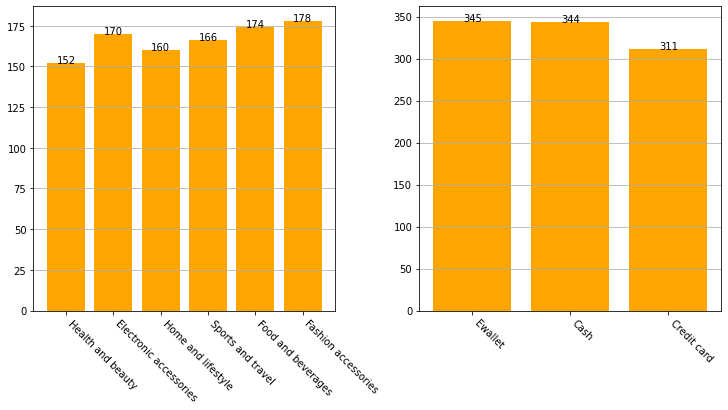

In [220]:
fig2 = plt.figure(constrained_layout=True, figsize=(10,10))
spec2 = grd.GridSpec(ncols=2, nrows=2, figure=fig2)
ax1 = fig2.add_subplot(spec2[0, 0])
d = {}
Unique = cat.Product.unique()
Value_Counts = cat.Product.value_counts()
for i in Unique:
    d[i] = Value_Counts[i]
x = list(d.keys())
y = list(d.values())
for index in range(len(Unique)):
    ax1.text(x[index],y[index],str(y[index]),horizontalalignment='center')
    ax1.bar(x,y,color='orange')
    ax1.set_xticklabels(x,rotation='-45',horizontalalignment='left')
    ax1.grid(True, axis='y')
ax2 = fig2.add_subplot(spec2[0, 1])
d = {}
Unique = cat.Payment.unique()
Value_Counts = cat.Payment.value_counts()
for i in Unique:
    d[i] = Value_Counts[i]
x = list(d.keys())
y = list(d.values())
for index in range(len(Unique)):
    ax2.text(x[index],y[index],str(y[index]),horizontalalignment='center')
    ax2.bar(x,y,color='orange')
    ax2.set_xticklabels(x,rotation='-45',horizontalalignment='left')
    ax2.grid(True, axis='y')

    

In [177]:
Corr = num.corr()

<AxesSubplot:>

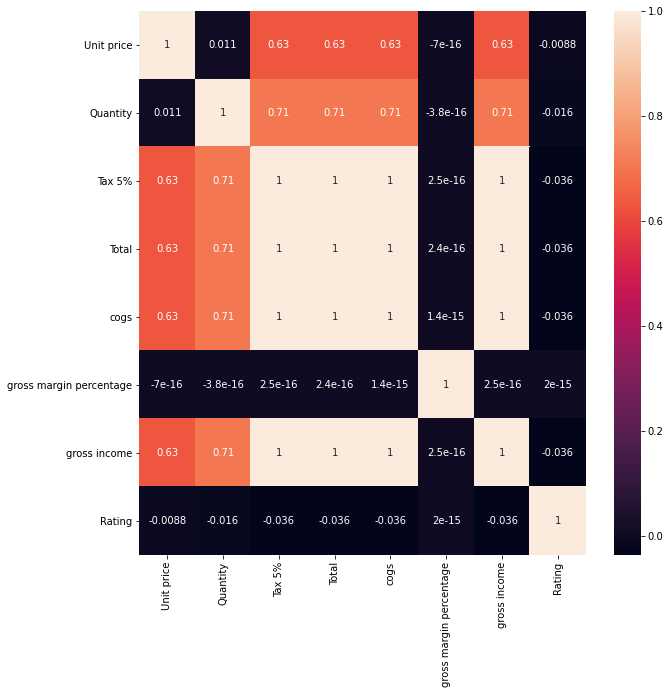

In [178]:
plt.figure(figsize=(10,10))
sns.heatmap(Corr,annot=True)

In [185]:
num.drop(columns=['cogs','Tax 5%','gross income'],inplace=True)

<AxesSubplot:>

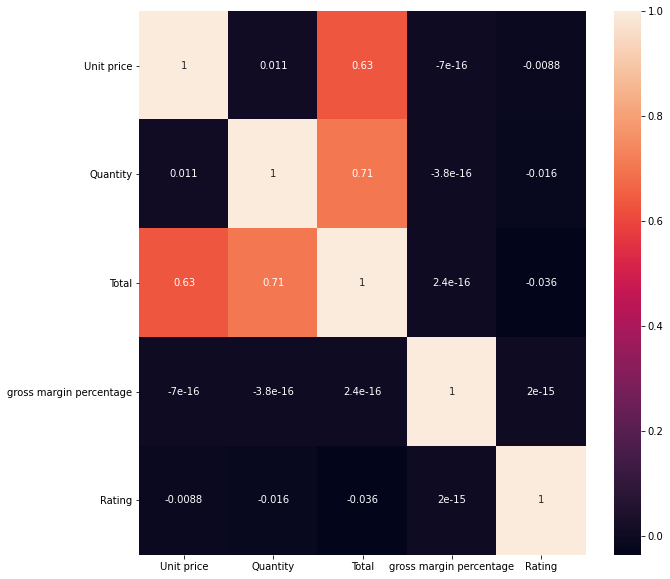

In [186]:
plt.figure(figsize=(10,10))
C = num.corr()
sns.heatmap(C, annot=True)

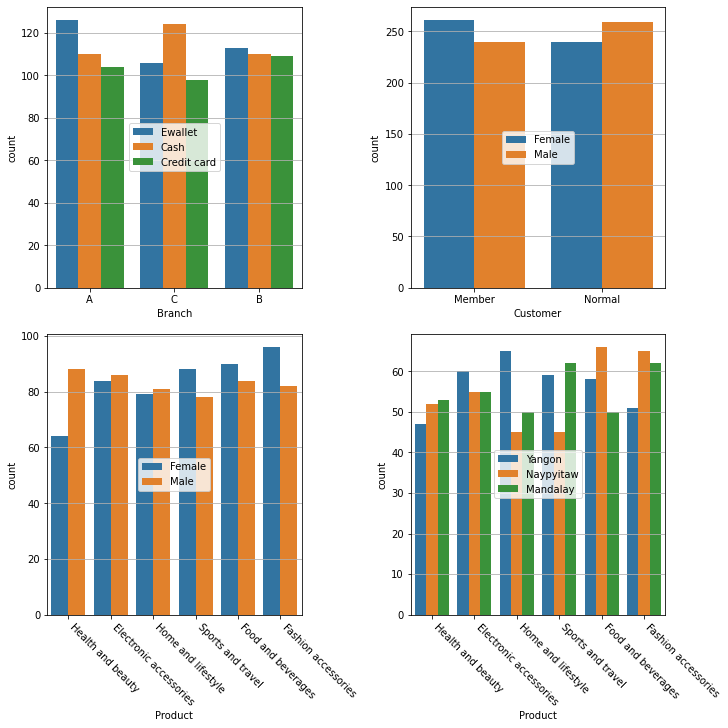

In [250]:
fig4=plt.figure(constrained_layout=True,figsize=(10,10))
spec = grd.GridSpec(nrows=2,ncols=2,figure=fig4)
ax1 = fig4.add_subplot(spec[0,0])
ax1.grid(True,axis='y')
sns.countplot(x='Branch',hue='Payment',data=cat)
ax1.legend(loc='center')
ax2 = fig4.add_subplot(spec[0,1])
ax2.grid(True,axis='y')
sns.countplot(x='Customer',hue='Gender',data=cat)
ax2.legend(loc='center')
ax3 = fig4.add_subplot(spec[1,0])
ax3.grid(True,axis='y')
sns.countplot(x='Product',hue='Gender',data=cat)
ax3.set_xticklabels(labels=cat['Product'].unique(),rotation='-45',horizontalalignment='left')
ax3.legend(loc='center')
ax4 = fig4.add_subplot(spec[1,1])
ax4.grid(True,axis='y')
sns.countplot(x='Product',hue='City',data=cat)
ax4.set_xticklabels(labels=cat['Product'].unique(),rotation='-45',horizontalalignment='left')
ax4.legend(loc='center')